In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("netflix_titles.csv")

In [8]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Treating Null Values
# We will first change change the null values of columns "date_added" & "rating" as these are small in number and doesn't impact a lot.


In [12]:
df['rating'].fillna(method = 'bfill', inplace = True)

In [13]:
df['date_added'].fillna(method = 'ffill', inplace = True)

In [14]:
# Now we delete all the null values that impact our data.


In [15]:
df.dropna(how = 'any', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 6213
Data columns (total 12 columns):
show_id         3778 non-null int64
type            3778 non-null object
title           3778 non-null object
director        3778 non-null object
cast            3778 non-null object
country         3778 non-null object
date_added      3778 non-null object
release_year    3778 non-null int64
rating          3778 non-null object
duration        3778 non-null object
listed_in       3778 non-null object
description     3778 non-null object
dtypes: int64(2), object(10)
memory usage: 383.7+ KB


In [17]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [18]:
# dropping unwanted columns.
# dropping "date_added" as we already have release_year

In [19]:
df.drop(columns = ['show_id','date_added','description'], inplace = True)

In [20]:
# Changing the names of the columns

In [21]:
df.columns = ['Type','Name','Director','Cast','Country','Release Year','Rating','Duration','Genre']

In [22]:
df.head()

,Type,Name,Director,Cast,Country,Release Year,Rating,Duration,Genre
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,TV-MA,60 min,Stand-Up Comedy
9,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2014,R,90 min,"Action & Adventure, Thrillers"


In [23]:
# Checking the Number of Movies to Number of Tv Shows.

In [24]:
df['Type'].value_counts()

Movie      3682
TV Show      96
Name: Type, dtype: int64

In [25]:
# Country with most movies & shows released(Top 10)

In [26]:
df['Country'].value_counts().head(10)

United States     1326
India              707
United Kingdom     152
Canada              78
Spain               72
Turkey              60
Japan               54
Mexico              51
Hong Kong           48
France              46
Name: Country, dtype: int64

In [27]:
df['Rating'].unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

In [28]:
#TV-PG - can be viewed by Younger Generation.
#TV-14 - Can only be viewed by children 14 or below.
#R -  Means movie contain adult content
#TV-MA -  only for adults
#NR = Not Rated
# PG-13 = Inappropriate for below 13 years
# PG = Parental Guidance required
# TV-Y7 = for age 7 or older
# G = Suitable for General Audience
# TV-G = Suitable for general audience.
# UR can be viewed by anyone
# TV-Y7-FV = Children 7 & above
# TV-Y = For children
# NC-17 = Anyone below 17 cannot watch.


In [29]:
# Now lets Convert all these categories to Kids & Adult section

In [49]:
young = ['TV-PG','TV-14','PG-13','TV-Y7','G','TV-G','UR','TV-Y7-FV','TV-Y']

In [58]:
def ratings(x):
    if x in young:
        return "Kids"
    else:
        return "Adults"

In [61]:
df['Rating'] = df['Rating'].apply(ratings)

In [63]:
df['Rating'].value_counts()

Adults    2044
Kids      1734
Name: Rating, dtype: int64

In [66]:
#changing the dataType of the data

In [77]:
# Removing Mins from Duration and just putting the integer value

In [75]:
df['Duration'] = df['Duration'].apply(lambda x : x.split(' ')[0])

In [86]:
#Renaming the column 'Duration'

In [87]:
df.rename(columns= {'Duration' : 'Duration (Min)'}, inplace = True)

In [85]:
df.head(2)

,Type,Name,Director,Cast,Country,Release Year,Rating,Duration (Min),Genre
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",1970,Kids,90,"Children & Family Movies, Comedies"
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,1970,Kids,99,Comedies


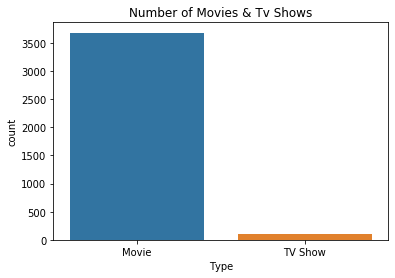

In [89]:
plt.title('Number of Movies & Tv Shows')
sns.countplot(x = df['Type'])

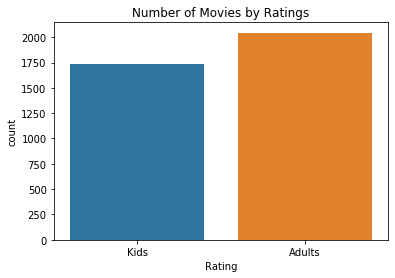

In [91]:
plt.title('Number of Movies by Ratings')
sns.countplot(df['Rating'])

C:\Users\Shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


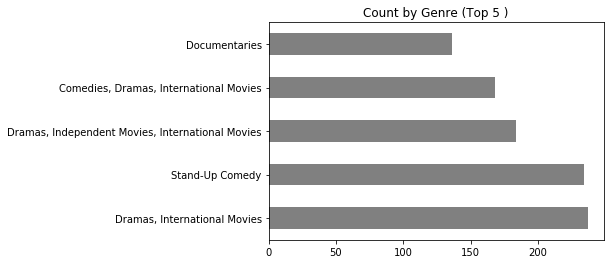

In [98]:
plt.title('Count by Genre (Top 5 )')
df['Genre'].value_counts().head(5).plot('barh', color = 'grey')